<h2 style="text-align: center;">Task Set 12</h2>
<h1 style="text-align: center;">R - lattice package</h1>

#### Wczytanie potrzebnych pakietów

In [1]:
# Użycie conflicted do zarządzania konfliktami
library(conflicted)

# Definiowanie preferencji dla funkcji
conflict_prefer("layer", "ggplot2")
conflict_prefer("combine", "dplyr")

library(lattice)
library(latticeExtra)
library(ggplot2)
library(tidyverse)
library(gridExtra)

[conflicted] Will prefer ggplot2::layer over any other package.
[conflicted] Will prefer dplyr::combine over any other package.
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1


## Zadanie 1: Daneiris

1. Wykonaj wykres rozrzutu. Na osi X umieść `Petal.Length`, na osi Y umieść `Sepal.Length`.
   - Dodaj tytuł wykresu (Iris scatterplot) oraz nazwy osi (Petal length, Sepal length).

2. Wykonaj wykres rozrzutu. Na osi X umieść `Petal.Length`, na osi Y umieść `Sepal.Length`.
   - Poszczególne rodzaje irysów zaznacz innym kolorem. Dodaj legendę do wykresu.

3. Wykonaj histogram dla `Petal.Width`, wykonaj osobne panele dla każdej odmiany irysów.
   - Ustal liczbę przedziałów histogramu: 15. Ustaw panele wykresów obok siebie, w jednej linii. Na osi Y wartości powinny być wyrażone w procentach. Zmień kolor na histogramów na ciemnozielony.

4. Wykonaj wykres 3d. Osy Y `Petal.Width`, os Z `Petal.Length`, os X `Sepal.Length`.
   - Poszczególne odmiany zaznacz kolorem. Ustaw wielkość czcionki na 0.8 oraz parametr screen (x=-60, y=0, z=110).

5. Wykonaj wykres ramka-wąsy `Petal.Width` w zależności od odmiany, dodaj osi X i Y.
   - Następnie za pomocą atrybutu panel zmień wykres ramka-wąsy na wykres skrzynkowy (plotin plot).

6. Wykonaj wykres stripplot. Na osi X umieść odmianę irysów, na osi Y `Petal.Width`, dodaj suwam do danych, aby było widać wszystkie punkty na wykresie (jitter.data).


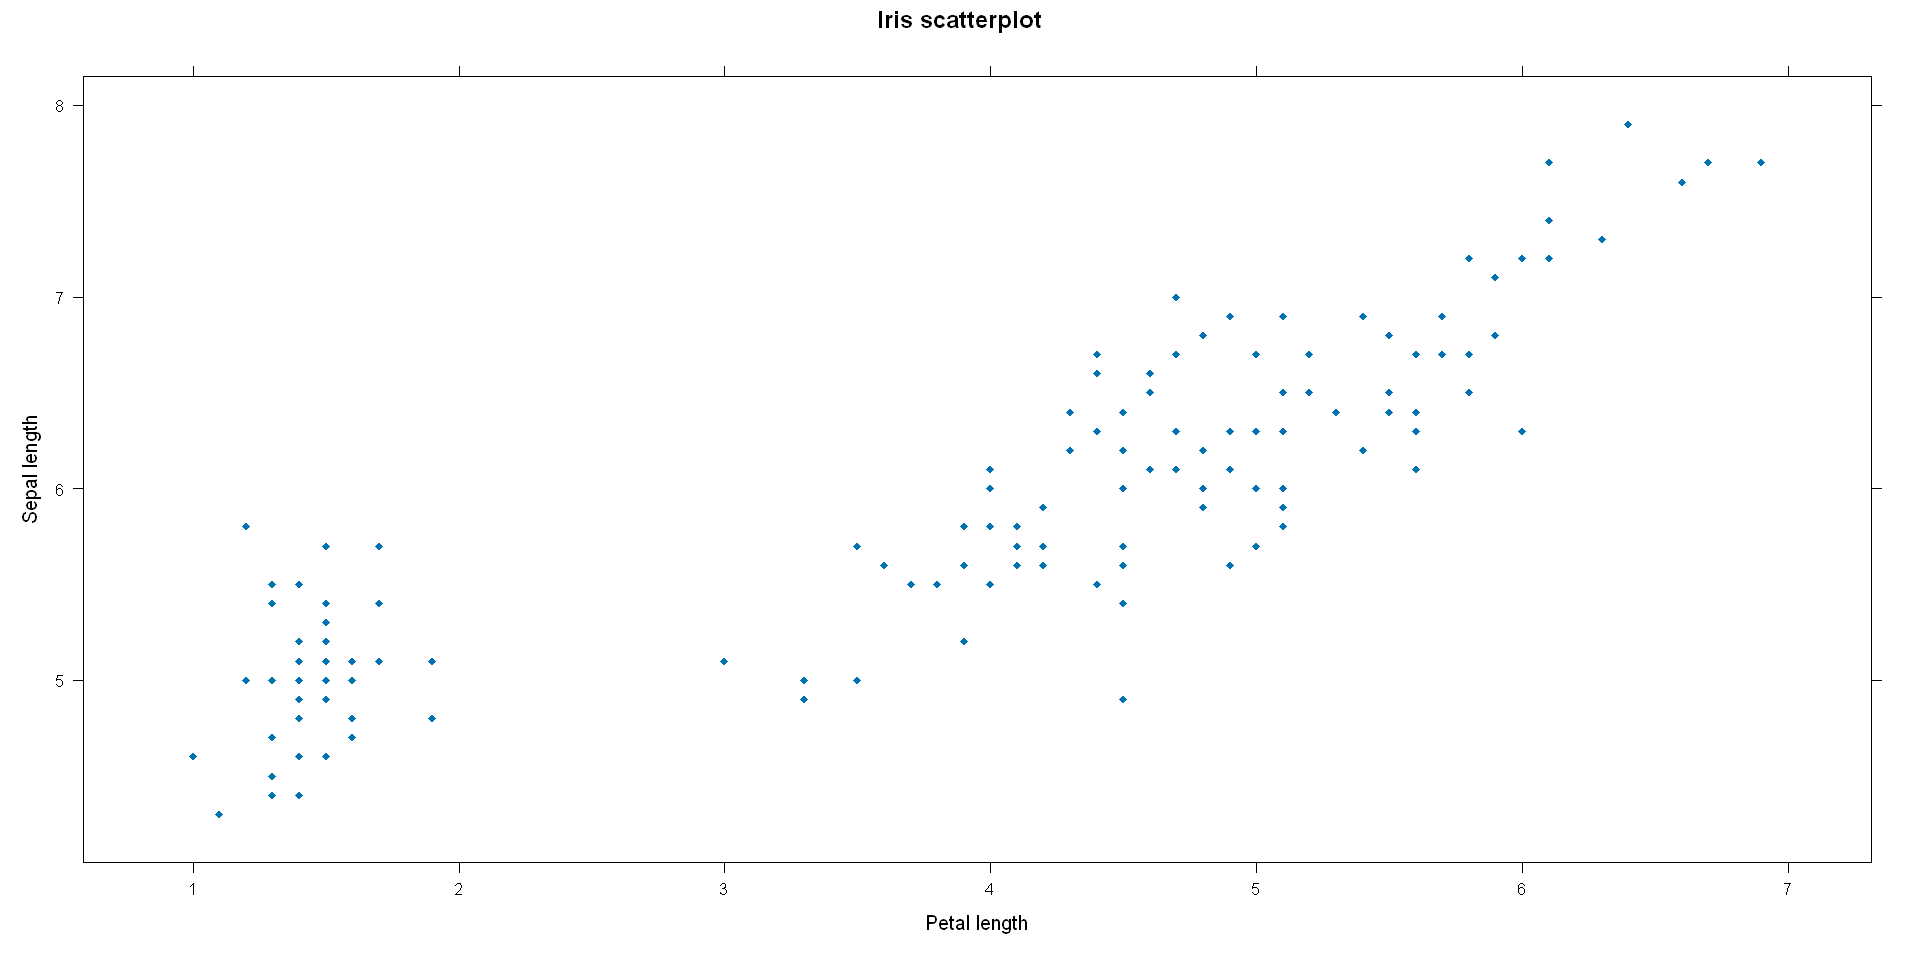

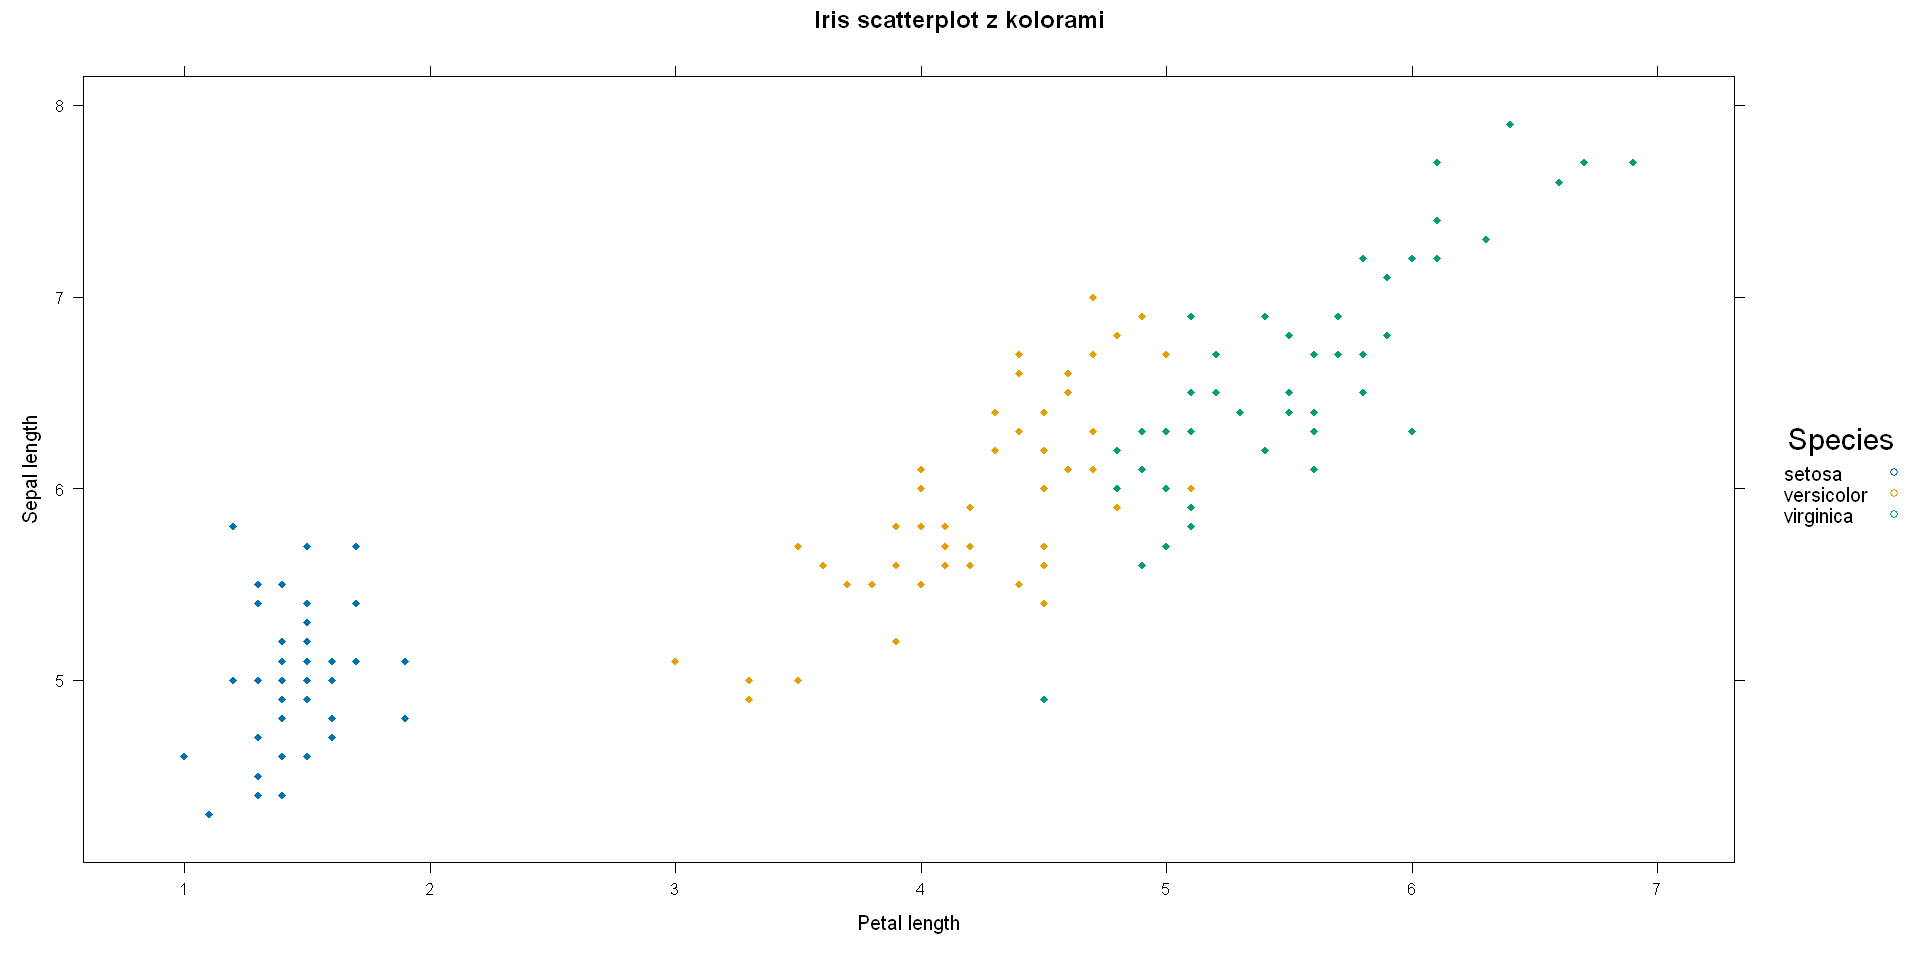

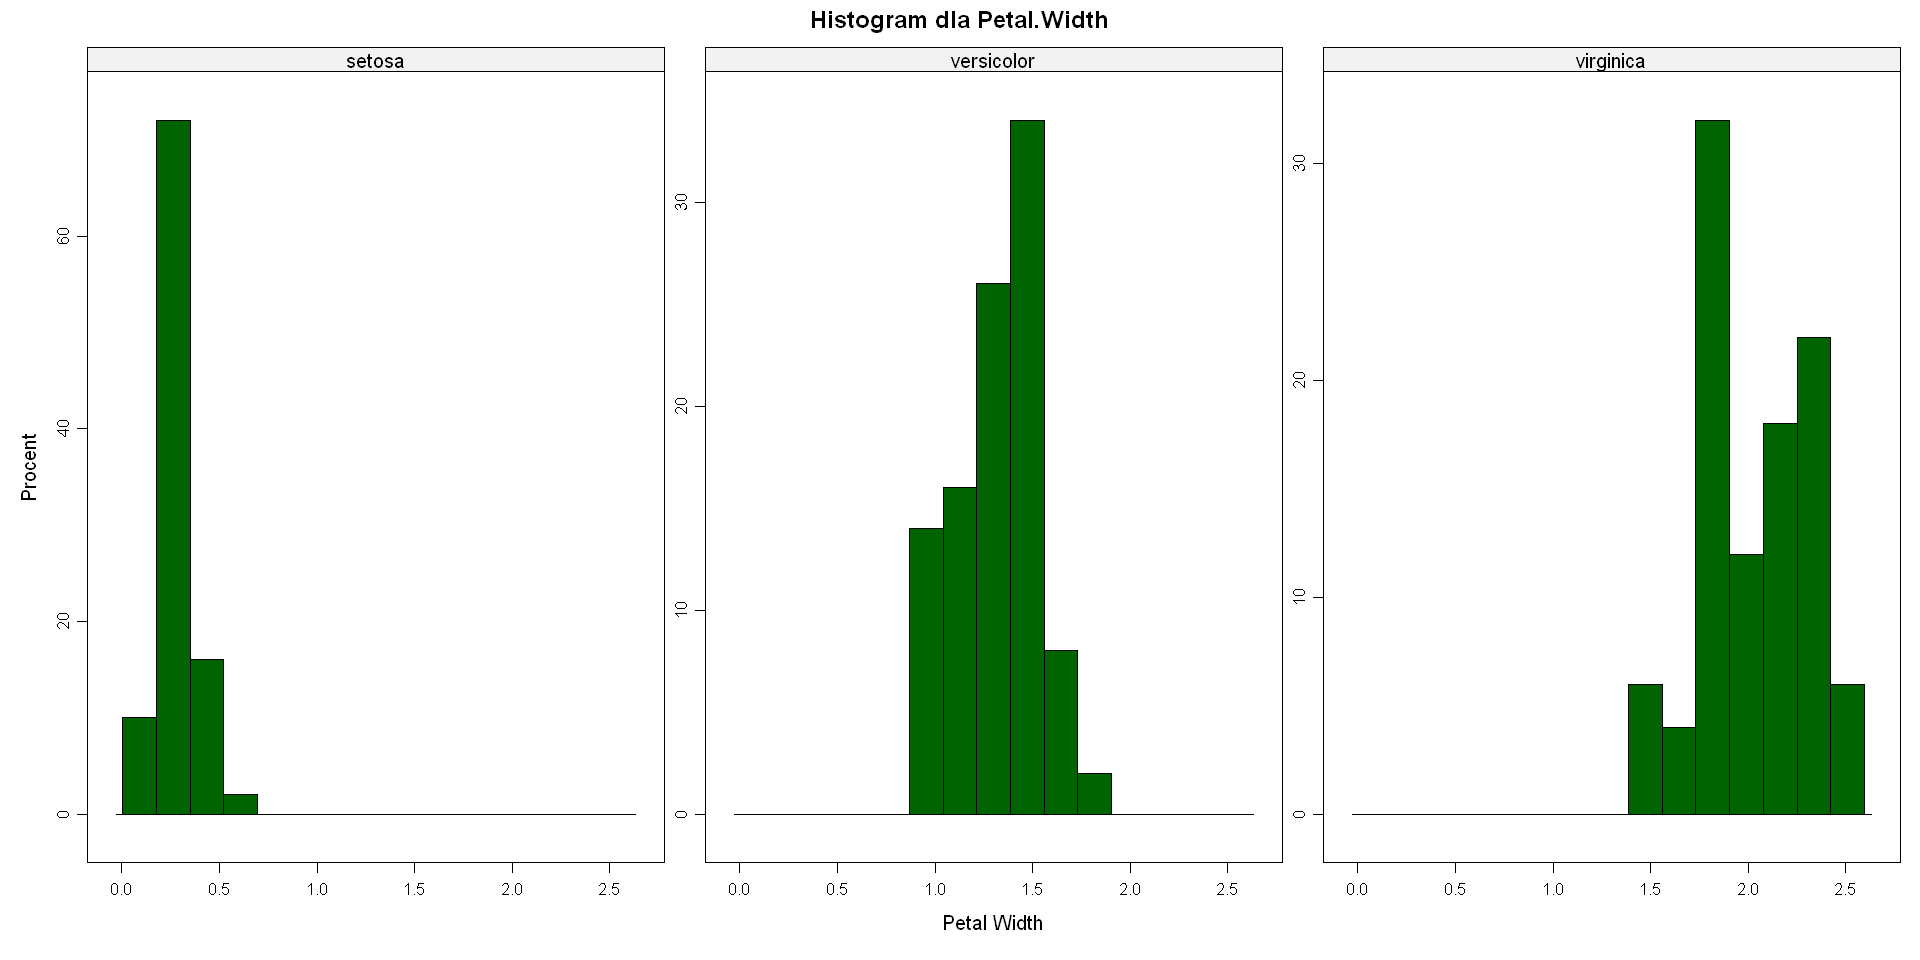

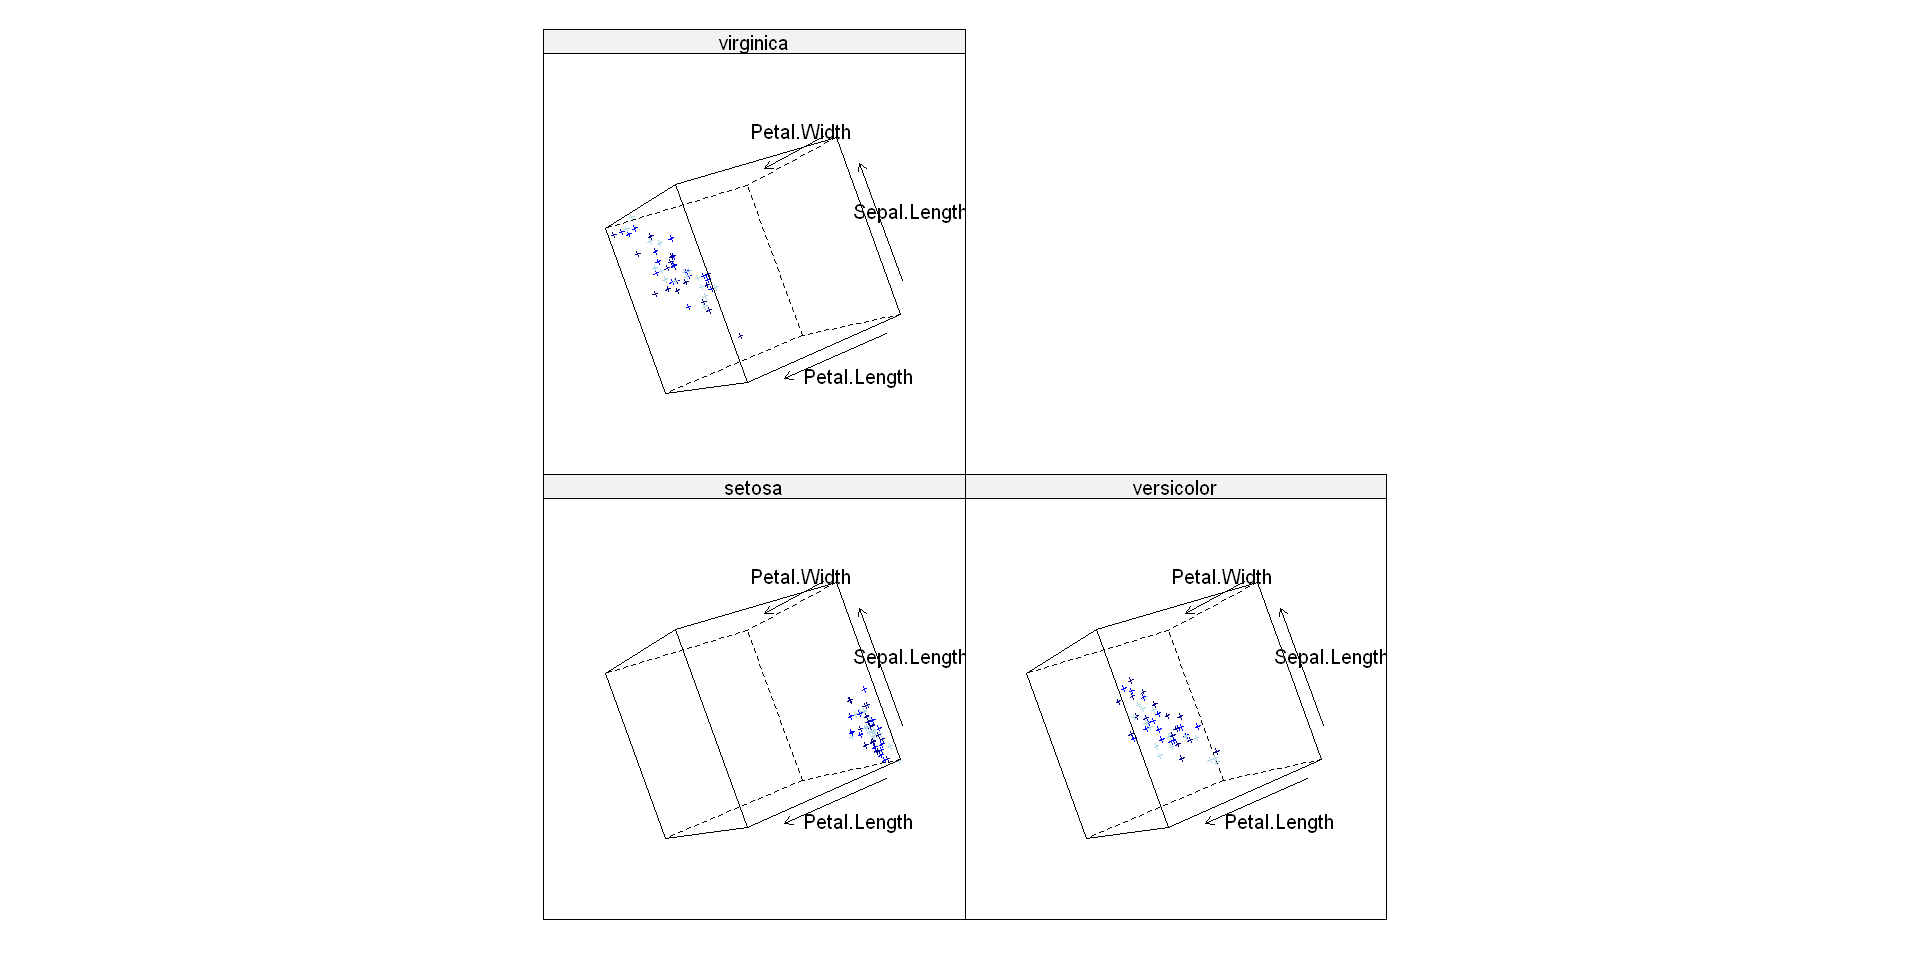

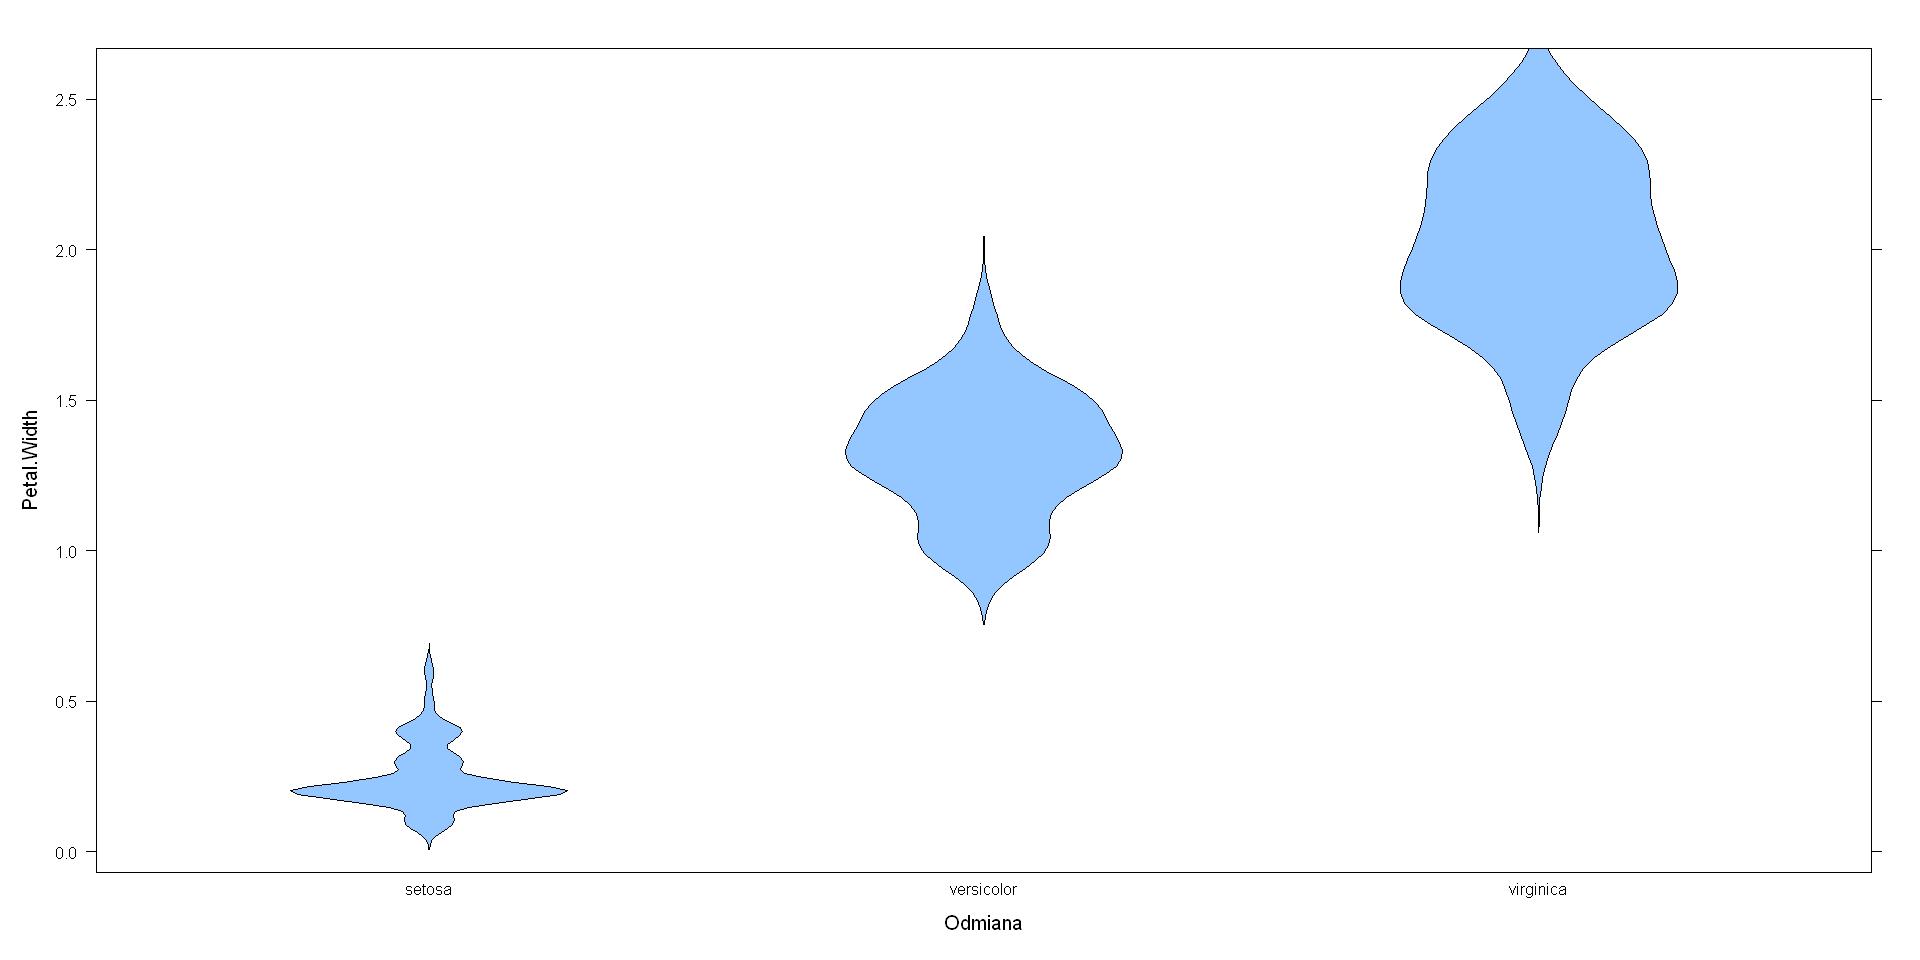

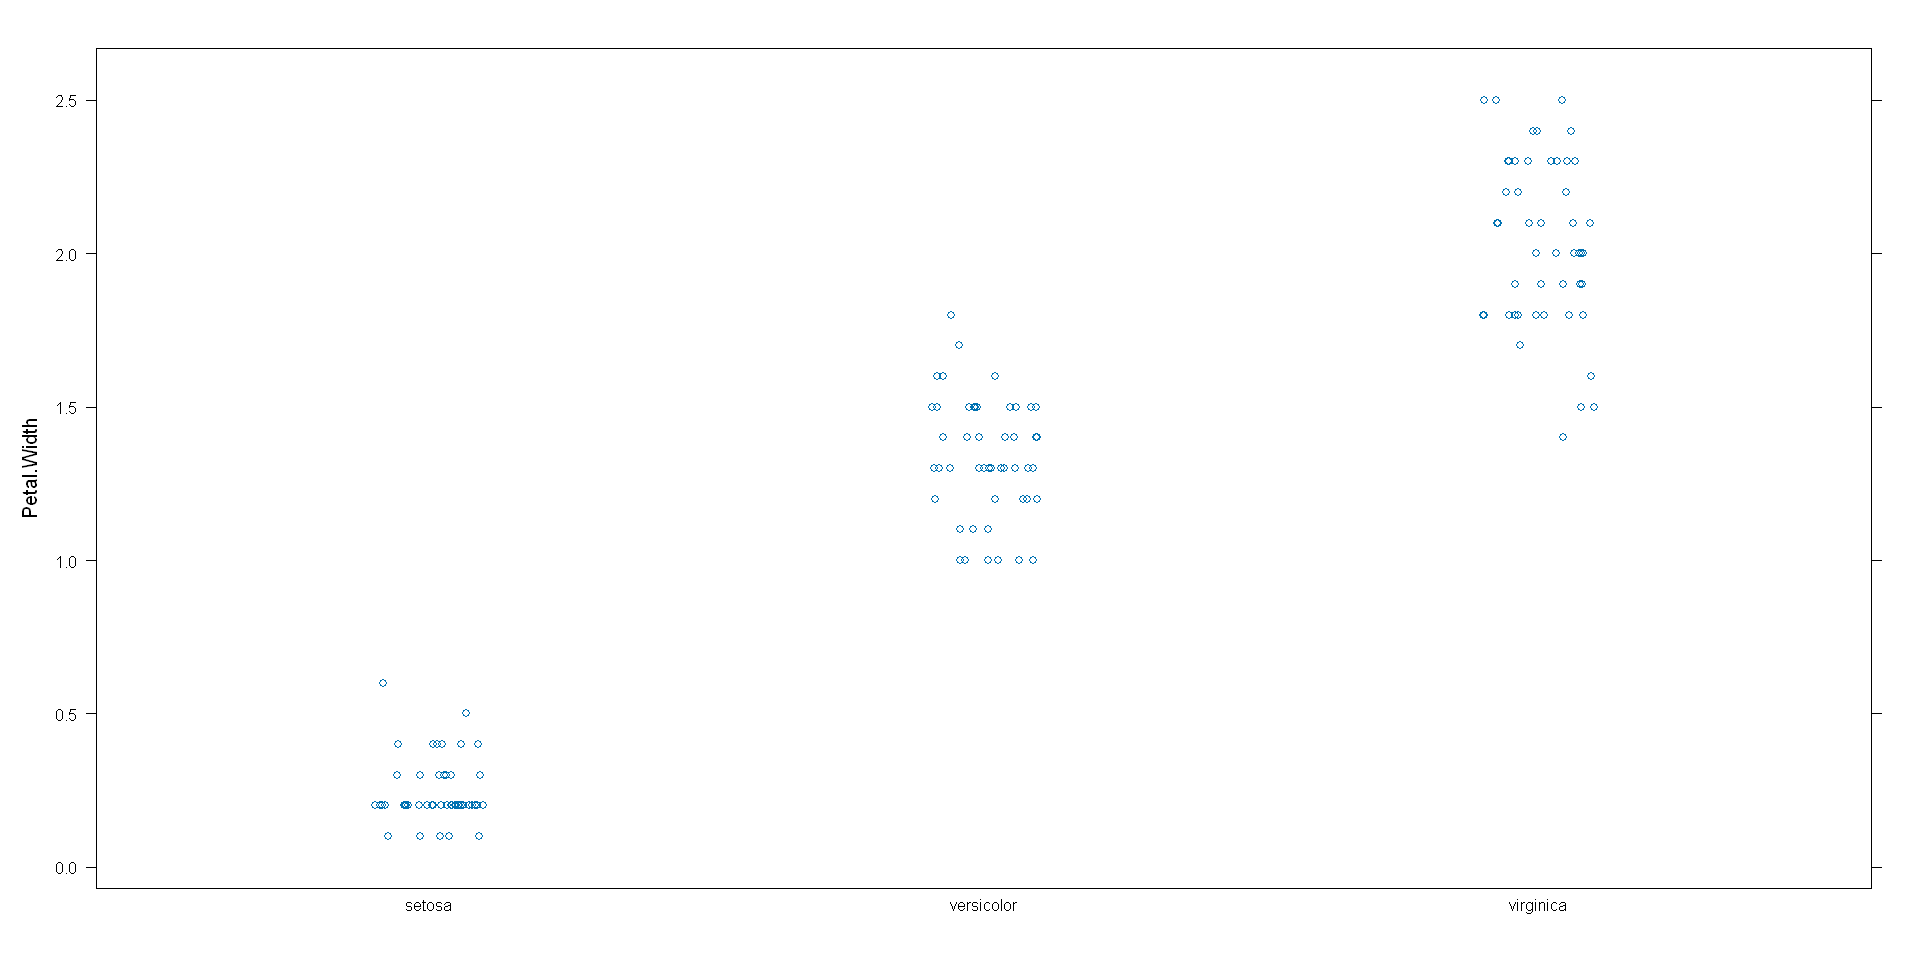

In [2]:
options(repr.plot.width = 16, repr.plot.height = 8) # Ustawienie szerokości okna wykresu

# 1. Wykonaj wykres rozrzutu z podstawowymi etykietami
xyplot(Sepal.Length ~ Petal.Length, data = iris,
       main = "Iris scatterplot", xlab = "Petal length", ylab = "Sepal length", pch = 18)

# 2. Wykres rozrzutu z kolorami i legendą
xyplot(Sepal.Length ~ Petal.Length, data = iris, groups = Species,
       auto.key = list(space = "right", title = "Species"),
       main = "Iris scatterplot z kolorami",
       xlab = "Petal length", ylab = "Sepal length", pch = 18)

# 3. Histogramy dla Petal.Width z podziałem na gatunki
histogram(~ Petal.Width | Species, data = iris, nint = 15,
          col = "darkgreen",  # Ustaw kolor na ciemnozielony
          main = "Histogram dla Petal.Width", 
          xlab = "Petal Width", 
          ylab = "Procent",
          layout = c(3, 1),
          scales = list(relation = "free")) 

# 4. Wykres 3D z różnymi kolorami dla gatunków
cloud(Petal.Length ~ Sepal.Length * Petal.Width | Species, data = iris, screen = list(x = -60, y = 0, z = 110),
      col = c("darkblue", "lightblue", "blue"))

# 5. Wykres ramka-wąsy z funkcją panelową dla wykresu skrzypcowego
bwplot(Petal.Width ~ Species, data = iris,
       xlab = "Odmiana", ylab = "Petal.Width",
       panel = function(x, ...) {
           panel.violin(x, ...)
       })

# 6. Wykres stripplot z jitterem dla lepszej widoczności danych
stripplot(Petal.Width ~ Species, data = iris, jitter.data = TRUE)


## Zadanie 2: Dane diamonds z pakietu ggplot2

1. Utwórz wykres rozrzutu carat względem logarytmu z depth, warunkowanie na podstawie color. Ustaw widoczną siatkę na wykresie i linię trendu o parametrach y=1.33+0.515. Ułóż wykresy w 2 kolumnach.

2. Zapisz 2 panele z wykresu z podpunktu a (color E i F). Wykonaj ich modyfikacje:
   - zmień wielkość punktów, kształt punktów i kolor,
   - nadaj nazwy osi X i Y.

3. Wykonaj kolumnowy dla zmiennej carat warunkowanej przez zmienną price podzieloną na 3 różne grupy. Zmień proporcje wyświetlanych wykresów na 3:1.

4. Wykonaj histogram dla zmiennej price. Ustaw liczbę przedziałów histogramu na 8, na osi Y powinna się wyświetlać gęstość prawdopodobieństwa. Zmodyfikuj styl wyświetlania wykresu za pomocą gotowych nakładek.

5. Wykonaj wykresy:
   - ramka was dla zmiennej price,
   - wykres rozrzutu price względem carat, zmień kształt punktów, dla type() ustaw parametry: 3D price, carat, color.
   - Ułóż je koleno, aby pierwszy wykres zajmował dolną połowę urządzenia graficznego, wykres rozrzutu lewą górną ćwiartkę, a wykres 3D prawą górną ćwiartkę wykresu, z użyciem funkcji split().

6. Dla wykresów z punktu e) wykonaj taki sam podział z użyciem funkcji position().


Saving 7 x 7 in image


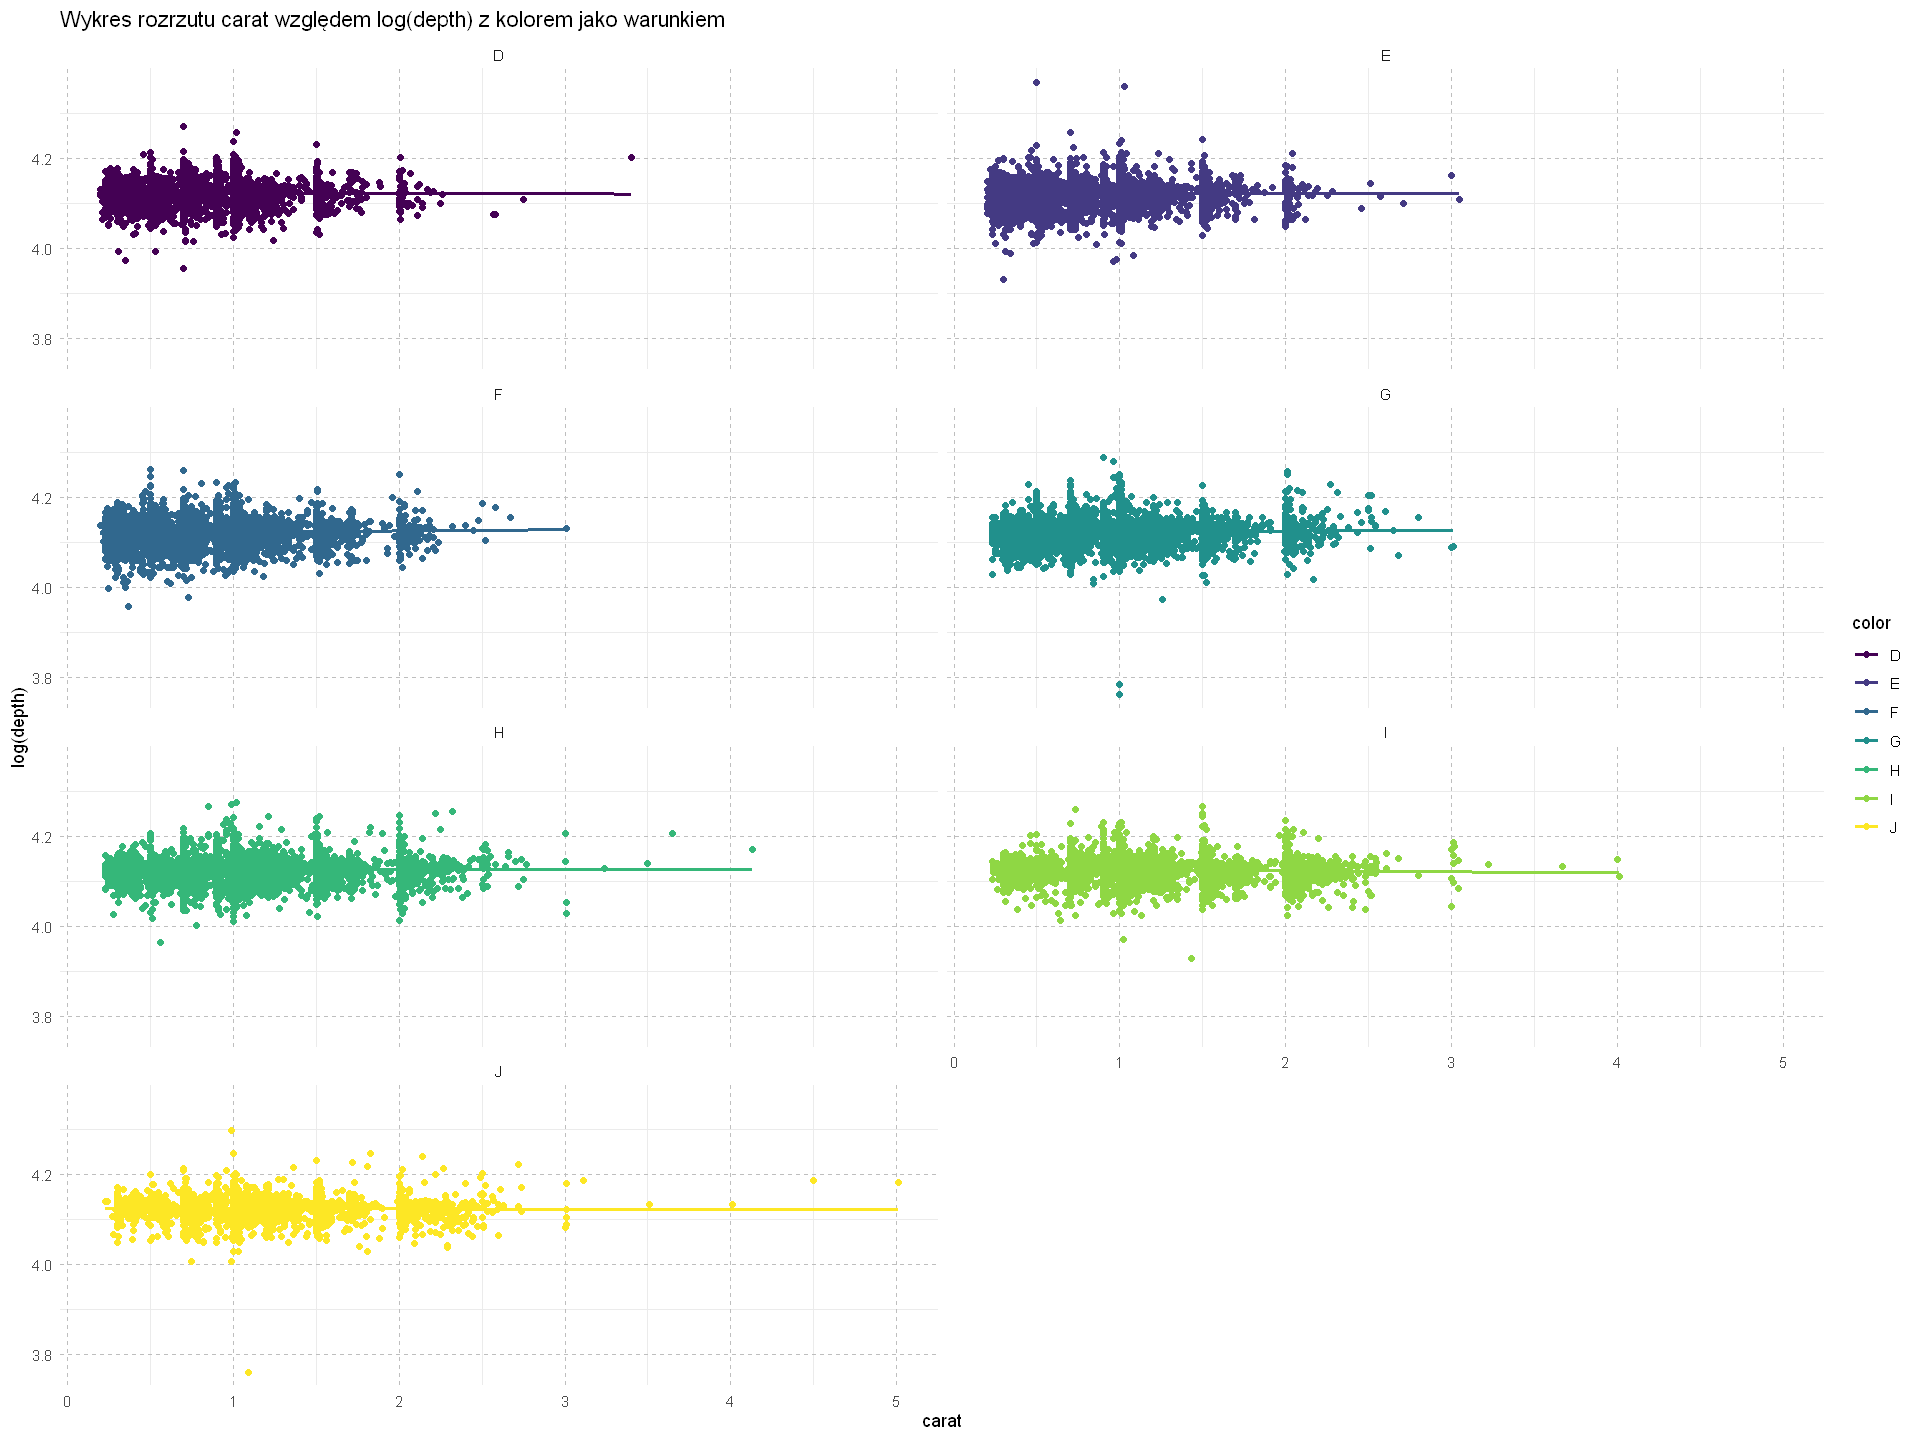

Warning message:
"The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead."


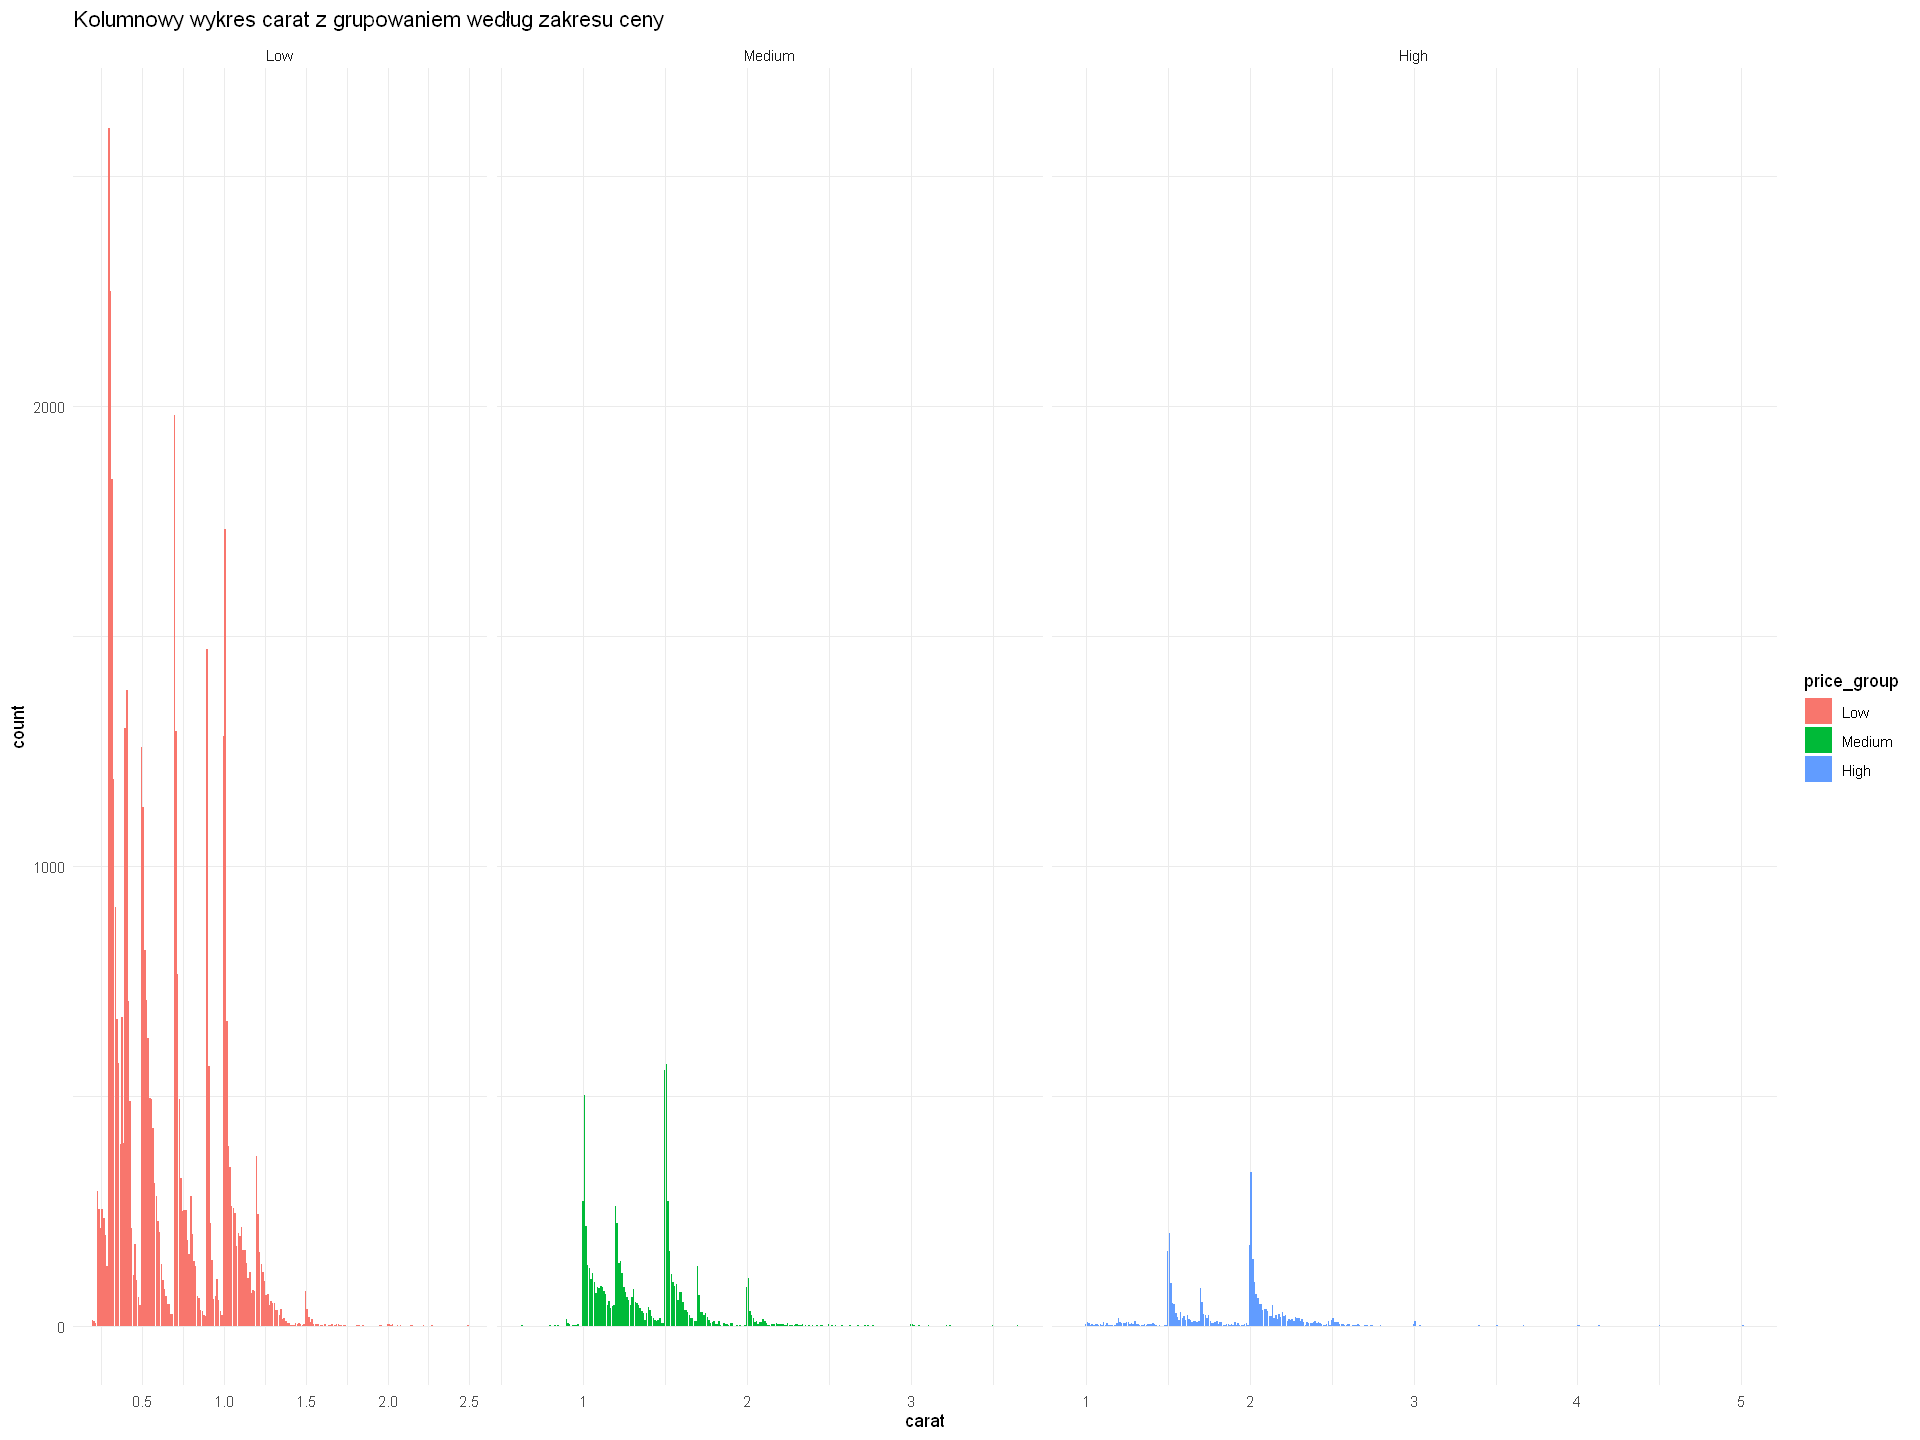

Warning message:
"The following aesthetics were dropped during statistical transformation:
colour.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?"
`geom_smooth()` using formula = 'y ~ x'


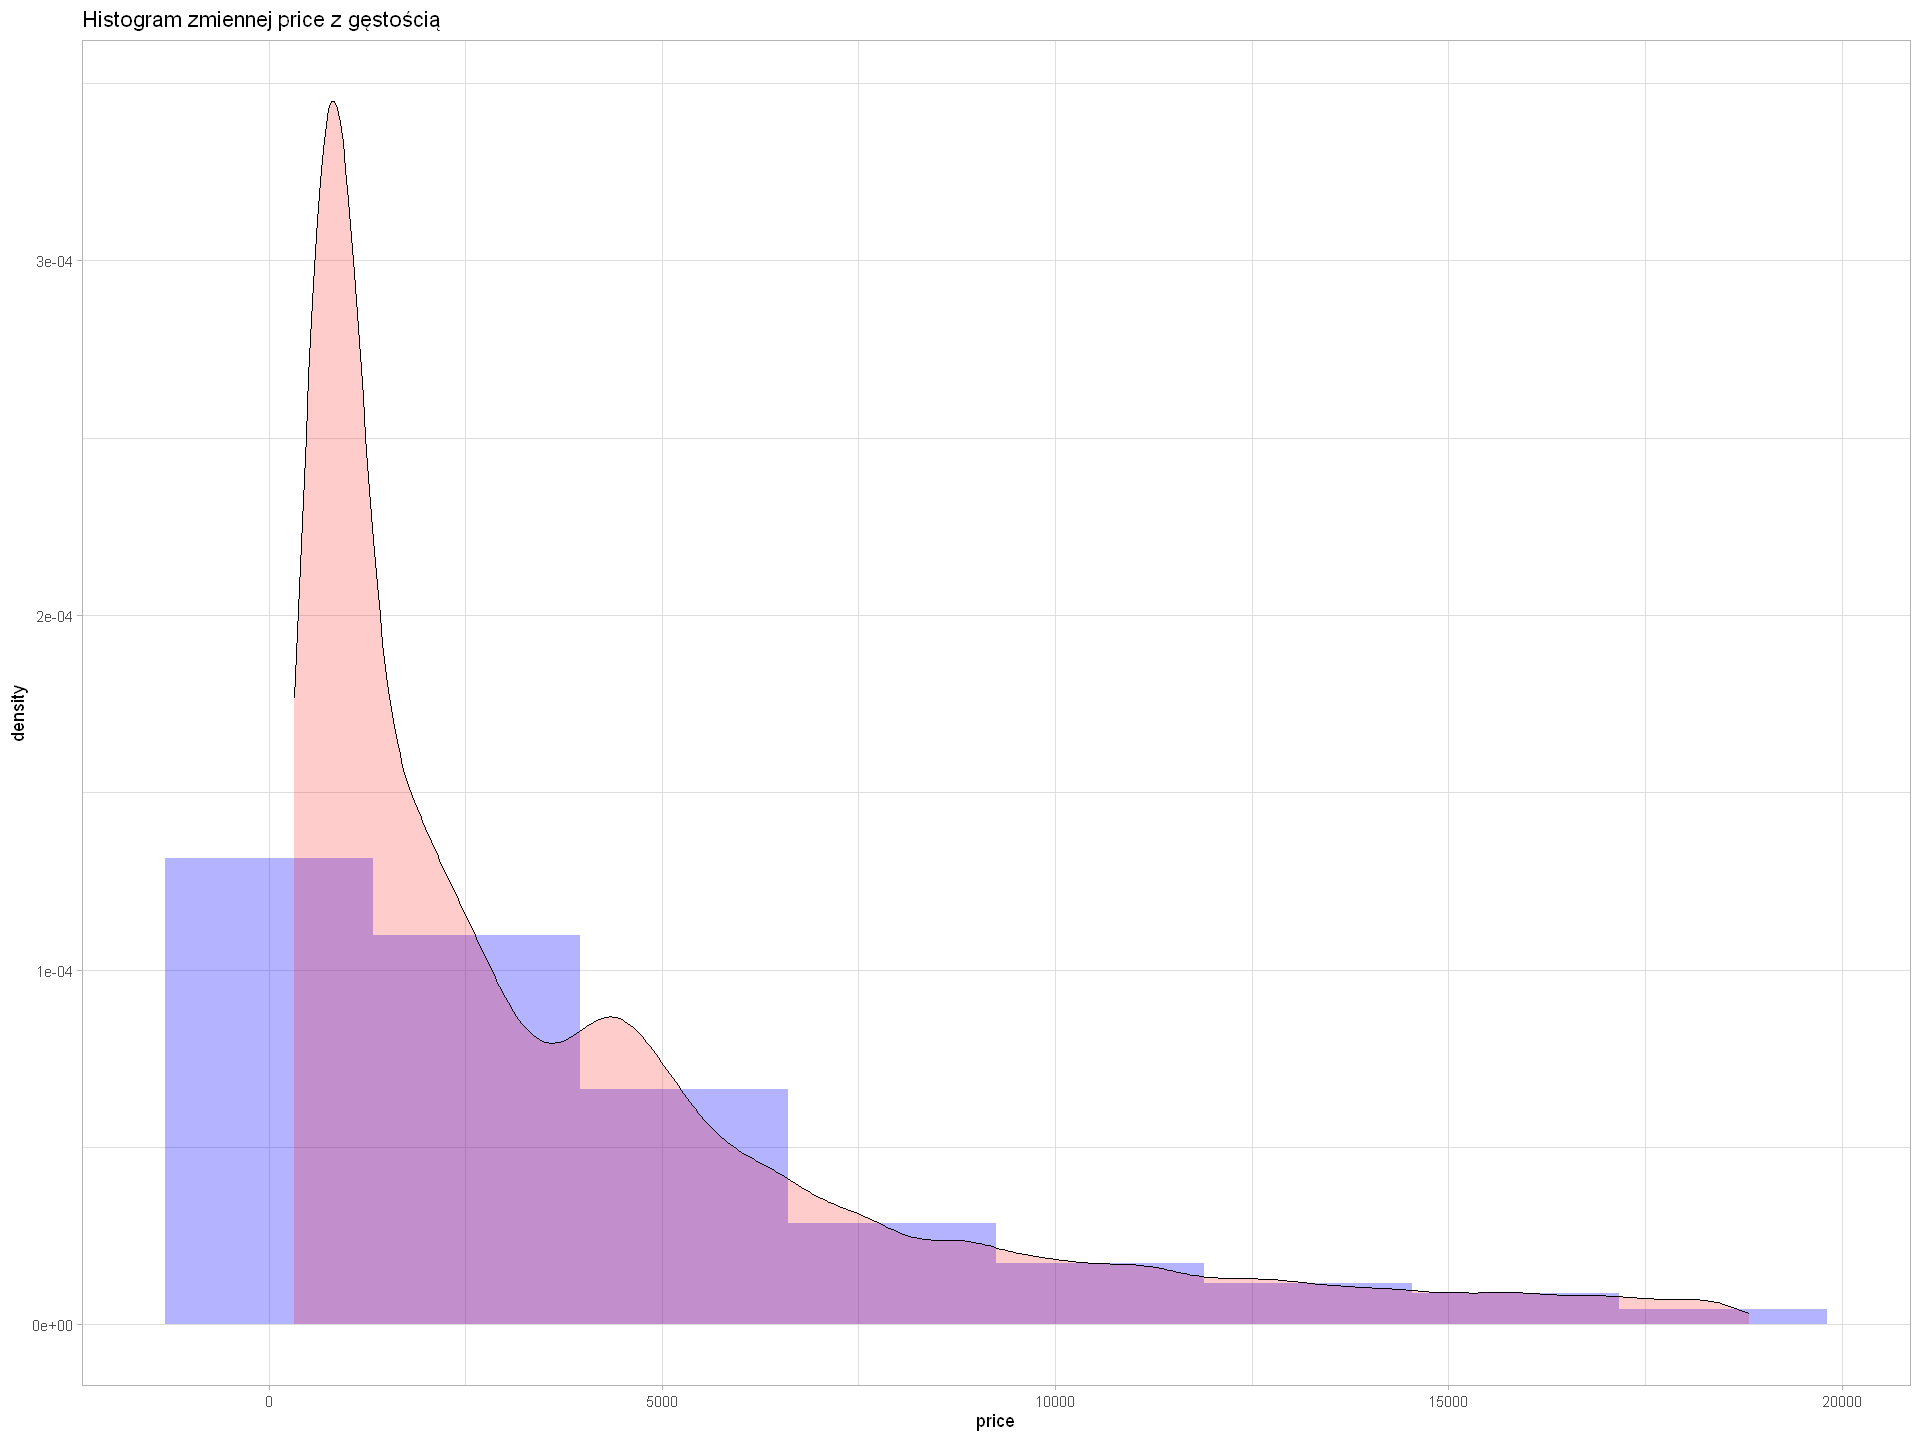

Saving 7 x 7 in image
`geom_smooth()` using formula = 'y ~ x'


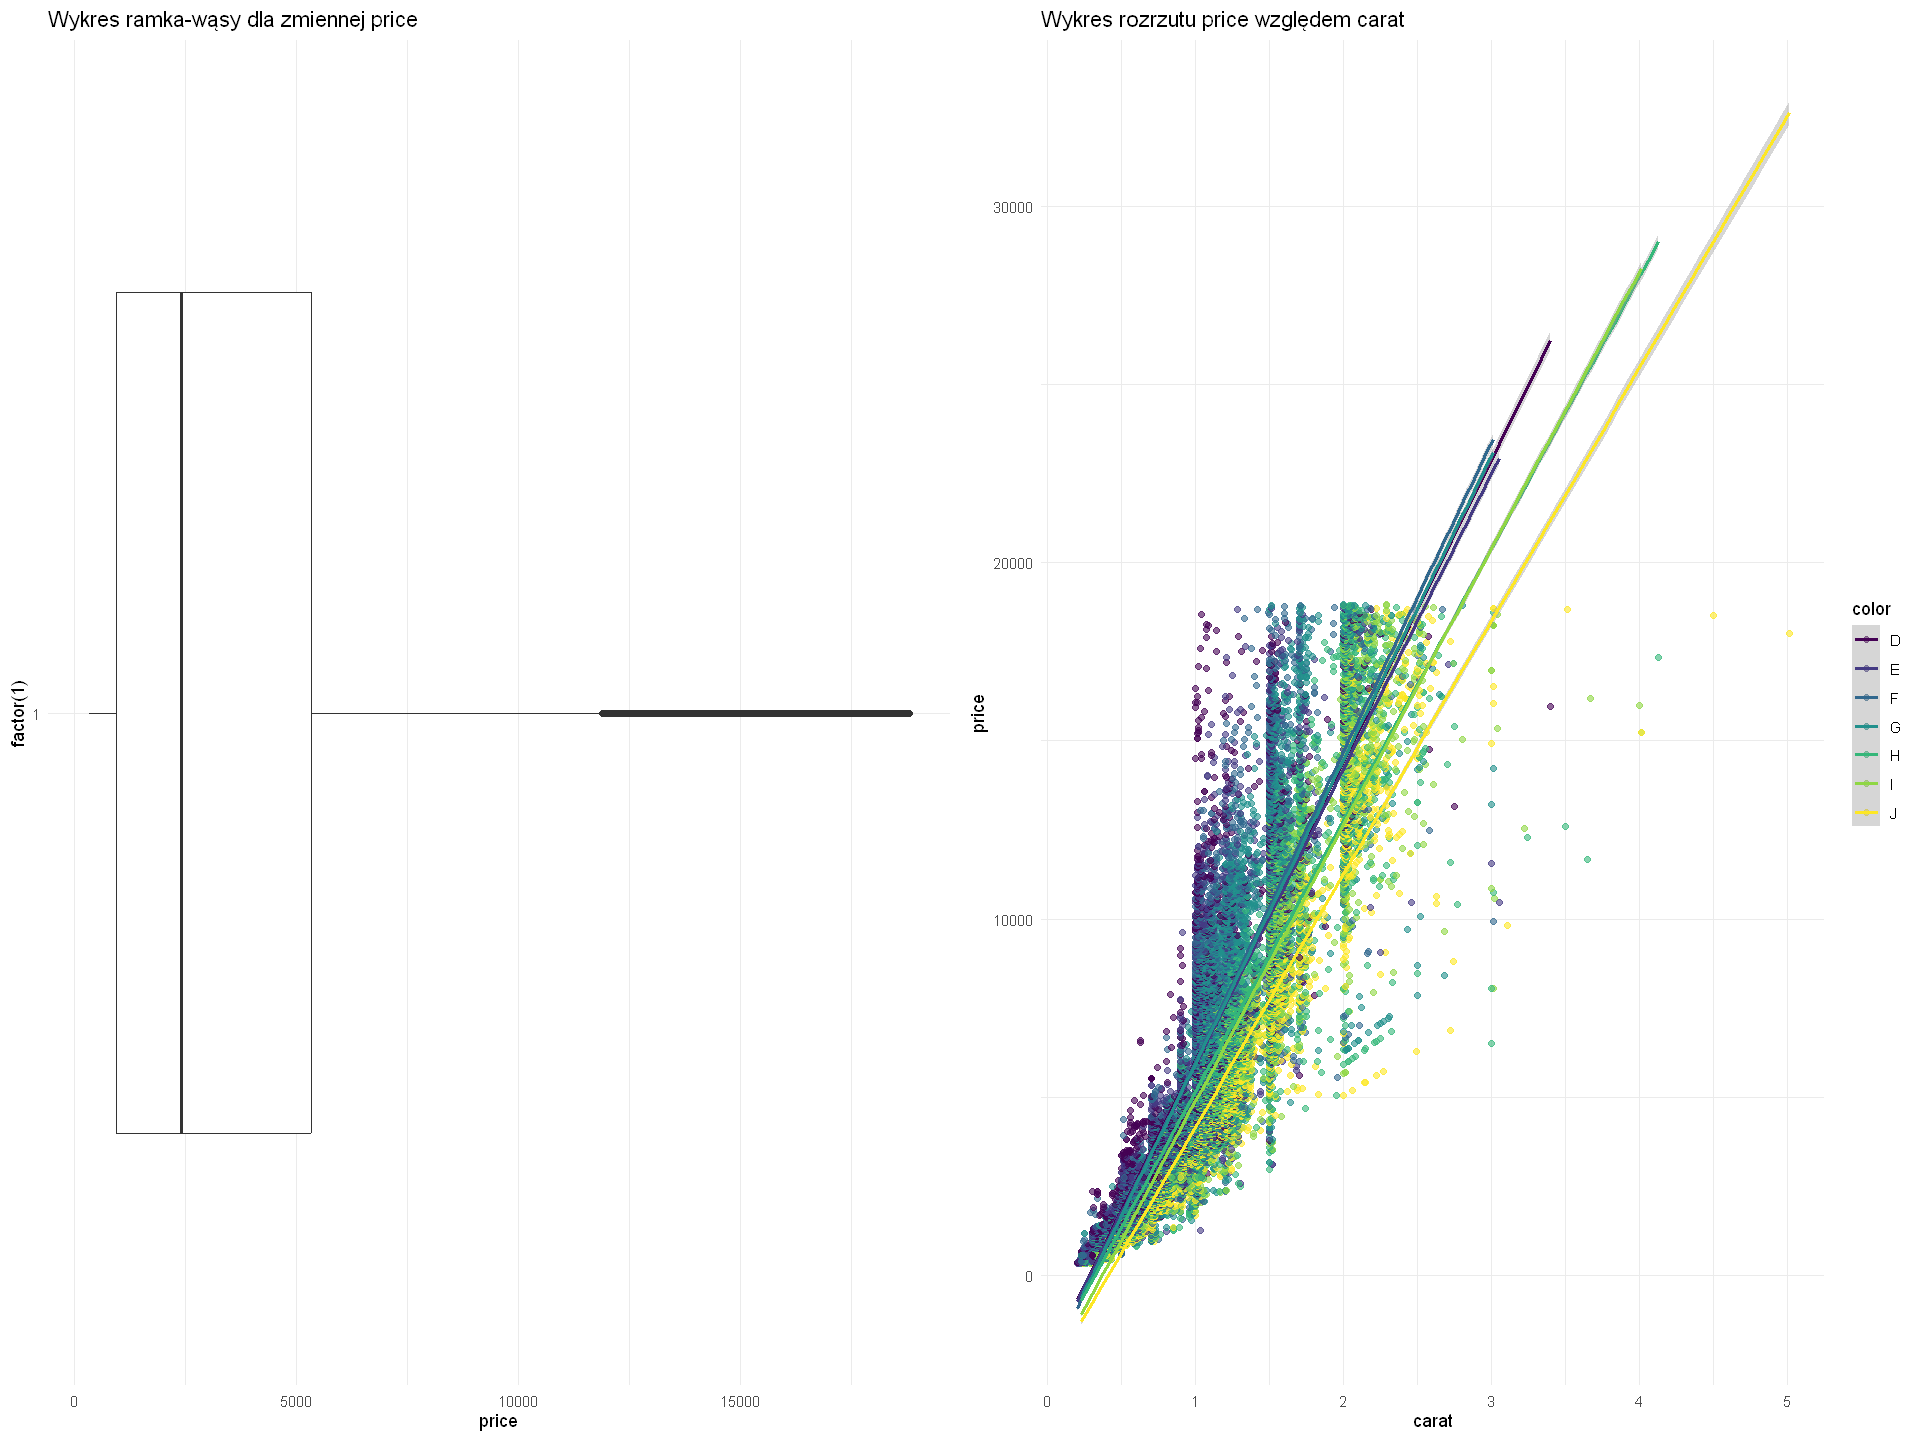

In [3]:
options(repr.plot.width = 16, repr.plot.height = 12) # Ustawienie szerokości okna wykresu

# 1. Utworzenie wykresu rozrzutu carat względem logarytmu z depth
ggplot(diamonds, aes(x = carat, y = log(depth), color = color)) +
  geom_point() +
  geom_smooth(method = "lm", formula = y ~ x, se = FALSE) +
  facet_wrap(~ color, ncol = 2) +
  theme_minimal() +
  theme(panel.grid.major = element_line(colour = "gray", linetype = "dashed")) +
  ggtitle("Wykres rozrzutu carat względem log(depth) z kolorem jako warunkiem")

# 2. Zapisywanie paneli dla kolorów E i F oraz ich modyfikacja
subset_diamonds <- subset(diamonds, color %in% c("E", "F"))
ggsave("panel_E_F.png", plot = ggplot(subset_diamonds, aes(x = carat, y = log(depth), color = color)) +
  geom_point(shape = 21, size = 3, fill = "white") +
  scale_color_manual(values = c("E" = "green", "F" = "orange")) +
  labs(x = "Carat", y = "Log Depth", title = "Modyfikacja paneli dla kolorów E i F"))

# 3. Kolumnowy wykres dla carat, warunkowany przez price
diamonds$price_group <- cut(diamonds$price, breaks = 3, labels = c("Low", "Medium", "High"))
ggplot(diamonds, aes(x = carat, fill = price_group)) +
  geom_bar(stat = "count") +
  facet_grid(~ price_group, scales = "free", space = "free") +
  theme_minimal() +
  ggtitle("Kolumnowy wykres carat z grupowaniem według zakresu ceny")

# 4. Histogram dla price z gęstością prawdopodobieństwa
ggplot(diamonds, aes(x = price)) +
  geom_histogram(aes(y = ..density..), bins = 8, fill = "blue", alpha = 0.3) +
  geom_density(fill = "red", alpha = 0.2) +
  theme_light() +
  ggtitle("Histogram zmiennej price z gęstością")

# 5. Wykresy ramka-wąsy i rozrzutu
p1 <- ggplot(diamonds, aes(x = factor(1), y = price, color = carat)) +
  geom_boxplot() +
  coord_flip() +
  theme_minimal() +
  ggtitle("Wykres ramka-wąsy dla zmiennej price")

p2 <- ggplot(diamonds, aes(x = carat, y = price, color = color)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm") +
  theme_minimal() +
  ggtitle("Wykres rozrzutu price względem carat")

# Rozmieszczanie wykresów obok siebie
grid.arrange(p1, p2, nrow = 1)

# 6. Wykres z użyciem position()
p <- ggplot(diamonds, aes(x = price, y = carat, color = color)) +
  geom_point(position = position_jitter(width = 0.1, height = 0.1), alpha = 0.6) +
  geom_smooth(method = "lm", se = FALSE) +
  theme_minimal() +
  ggtitle("Wykres rozrzutu z funkcją position")

ggsave("combined_plots.png", plot = p)
